In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene
import numpy as np
import scipy.stats as stats

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Csv folder/Auto Pollution Filter Noise.csv')

df

,Noise,Size,Type,Side
0,810,1,1,1
1,820,1,1,1
2,820,1,1,1
3,840,2,1,1
4,840,2,1,1
5,845,2,1,1
6,785,3,1,1
7,790,3,1,1
8,785,3,1,1
9,835,1,1,2


Assumption 1 - You have a continuous dependant variable

Assumption 2 - You have two between-subjects factors

Assumption 3 - You have one within-subjects factors

Assumption 4 - There should be no significant outliers in any cell of the design

Assumption 5 - Your dependant variable should be approximately normally
distributed for each cell of the design

Assumption 6 - Variance of the dependant variable should be equal between the
groups of the between-subjects factors

Assumption 7 - The variance of the differences between the group should be
equal

In [4]:
model = ols('Noise ~ Size * Type * Side', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Size,16016.666667,1.0,39.658069,8.250915e-07
Type,1056.250000,1.0,2.615328,1.170479e-01
Size:Type,4.166667,1.0,0.010317,9.198203e-01
Side,0.694444,1.0,0.001719,9.672182e-01
Size:Side,1204.166667,1.0,2.981577,9.523614e-02
Type:Side,17.361111,1.0,0.042987,8.372503e-01
Size:Type:Side,266.666667,1.0,0.660280,4.233165e-01
Residual,11308.333333,28.0,NaN,NaN


# -Size:Type (three-way interaction):

F = 0.660280

p-value = 0.4233

This p-value is much greater than the common significance level (e.g., 0.05), indicating that the three-way interaction is not statistically significant.

# -Size (two-way interaction):

F = 0.010317

p-value = 0.9198

Again, the p-value is very high, suggesting that the interaction between vehicle size and type is not significant.

# -Size (two-way interaction):

F = 2.981577

p-value = 0.0952

This p-value is slightly above 0.05, meaning the interaction between vehicle size and side is marginally non-significant. It is close but still above the threshold.

# -Type (two-way interaction):

F = 0.042987

p-value = 0.8373

This is also non-significant.

There is no significant interaction between vehicle size, type, and side on noise levels. The main significant factor affecting noise levels is vehicle size, but the interactions among size, type, and side do not appear to play a significant role.

<Figure size 800x600 with 0 Axes>

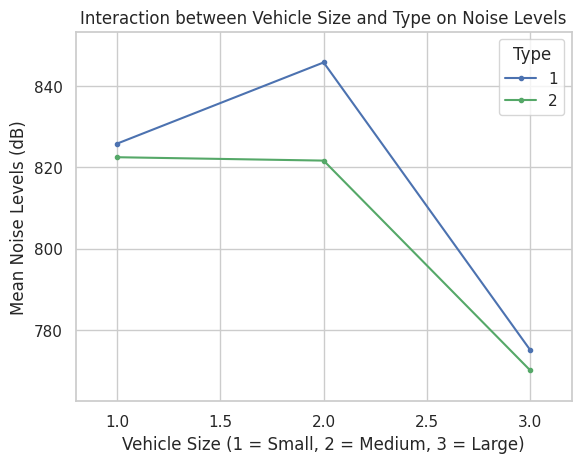

<Figure size 800x600 with 0 Axes>

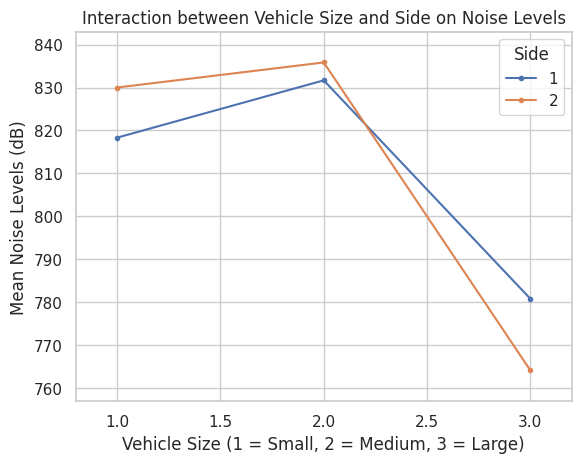

<Figure size 800x600 with 0 Axes>

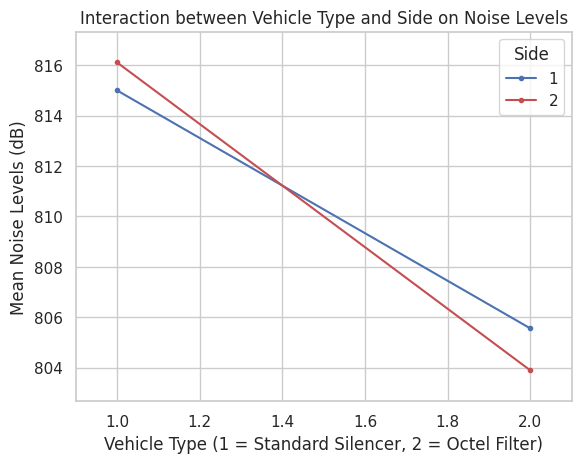

In [5]:
sns.set(style="whitegrid")

#Vehicle Size and Type
plt.figure(figsize=(8, 6))
interaction_plot(df['Size'], df['Type'], df['Noise'], colors=['#4C72B0', '#55A868'])
plt.title('Interaction between Vehicle Size and Type on Noise Levels')
plt.xlabel('Vehicle Size (1 = Small, 2 = Medium, 3 = Large)')
plt.ylabel('Mean Noise Levels (dB)')
plt.show()

#Vehicle Size and Side
plt.figure(figsize=(8, 6))
interaction_plot(df['Size'], df['Side'], df['Noise'], colors=['#4C72B0', '#DD8452'])
plt.title('Interaction between Vehicle Size and Side on Noise Levels')
plt.xlabel('Vehicle Size (1 = Small, 2 = Medium, 3 = Large)')
plt.ylabel('Mean Noise Levels (dB)')
plt.show()

#Type and Side
plt.figure(figsize=(8, 6))
interaction_plot(df['Type'], df['Side'], df['Noise'], colors=['#4C72B0', '#C44E52'])
plt.title('Interaction between Vehicle Type and Side on Noise Levels')
plt.xlabel('Vehicle Type (1 = Standard Silencer, 2 = Octel Filter)')
plt.ylabel('Mean Noise Levels (dB)')
plt.show()

# Size Interaction

F = 0.0103

p-value = 0.9198 (very high)

There is no significant interaction between vehicle size and type on noise levels. This means that the effect of vehicle size on noise levels is similar regardless of whether the vehicle has a standard silencer (type 1) or an Octel filter (type 2).

# Size Interaction

F = 2.9816

p-value = 0.0952 (marginally non-significant)

The interaction between vehicle size and side is marginally non-significant. While this interaction is not strong enough to be statistically significant at the 0.05 level, it suggests a possible effect worth further exploration. This could mean that the difference in noise levels between right and left sides may depend slightly on the vehicle size.

# Type Interaction
F = 0.0430

p-value = 0.8373 (very high)

There is no significant interaction between type and side on noise levels. This indicates that the effect of using a standard silencer or Octel filter does not differ significantly depending on whether the noise is measured on the right or left side of the vehicle.

The only two-way interaction that shows a hint of effect (though not statistically significant) is the interaction between vehicle size and side (p = 0.0952). This suggests that larger or smaller vehicles might produce slightly different noise levels depending on whether the measurement is taken on the right or left side, but the effect is not strong enough to be conclusive. Both Size and Type interactions are non-significant, meaning the relationship between these pairs of factors does not influence the noise levels.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


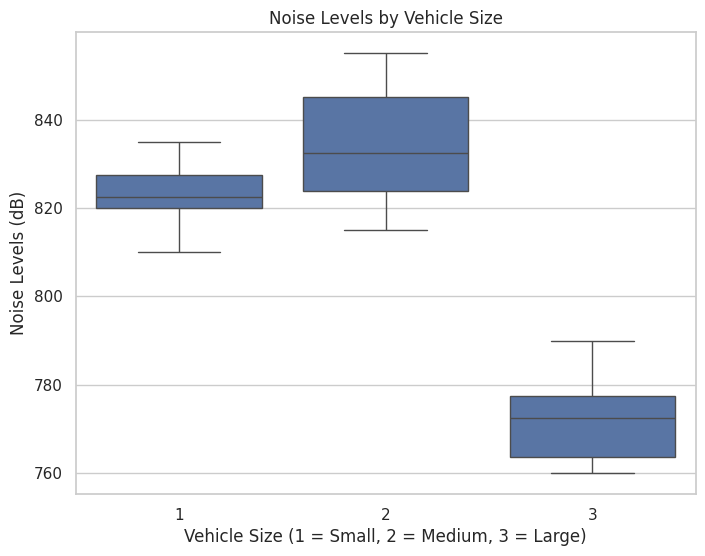

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


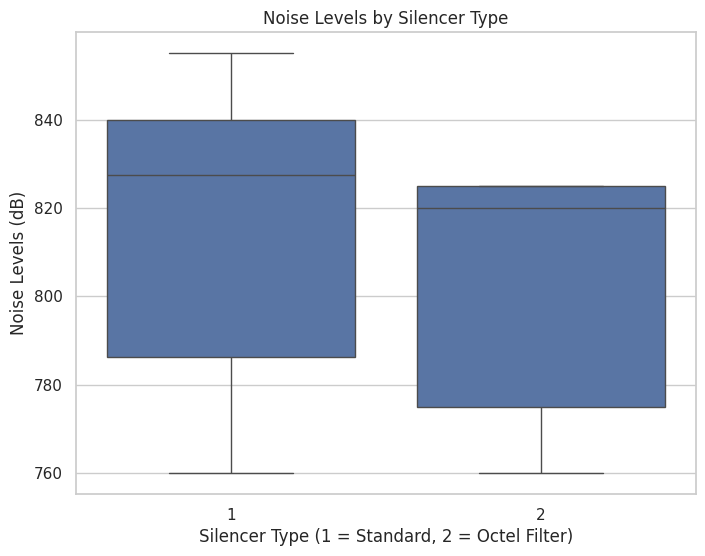

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


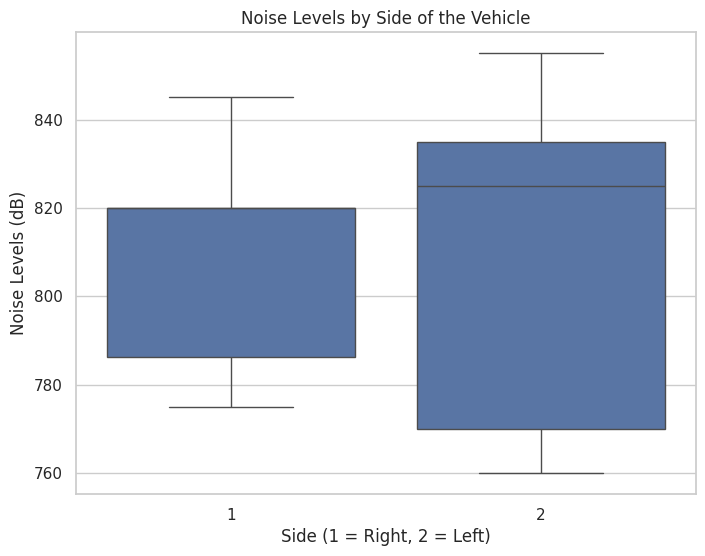

In [6]:
sns.set(style="whitegrid")

#Vehicle Size
plt.figure(figsize=(8, 6))
sns.boxplot(x='Size', y='Noise', data=df)
plt.title('Noise Levels by Vehicle Size')
plt.xlabel('Vehicle Size (1 = Small, 2 = Medium, 3 = Large)')
plt.ylabel('Noise Levels (dB)')
plt.show()

#Silencer
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Noise', data=df)
plt.title('Noise Levels by Silencer Type')
plt.xlabel('Silencer Type (1 = Standard, 2 = Octel Filter)')
plt.ylabel('Noise Levels (dB)')
plt.show()

#Side
plt.figure(figsize=(8, 6))
sns.boxplot(x='Side', y='Noise', data=df)
plt.title('Noise Levels by Side of the Vehicle')
plt.xlabel('Side (1 = Right, 2 = Left)')
plt.ylabel('Noise Levels (dB)')
plt.show()


# Main Effect of Vehicle Size

F = 39.6581

p-value = 8.25e-07 (very small)

The vehicle size has a statistically significant effect on noise levels. This suggests that larger vehicles produce significantly different noise levels compared to medium or small vehicles, regardless of the type of silencer or the side of the vehicle.

Given the significant p-value, larger vehicles likely produce higher noise levels compared to smaller ones.

# Main Effect of Vehicle Type (Silencer)

F = 2.6153

p-value = 0.1170 (non-significant)

The type of silencer (standard vs. Octel filter) does not have a significant effect on noise levels. This means there is no strong evidence that the Octel filter reduces noise more effectively compared to the standard silencer, regardless of vehicle size or side.

The p-value is not significant, suggesting that the silencer type alone does not make a substantial difference in noise reduction.

# Main Effect of Side (Right vs. Left)

F = 0.0017

p-value = 0.9672 (very high and non-significant)

The side of the vehicle from which the noise is measured does not significantly affect the noise levels. In other words, there is no significant difference in the noise readings between the right side and the left side, irrespective of vehicle size or silencer type.

Since the p-value is extremely high, the noise levels on the right and left sides are practically the same.


Vehicle size is the only factor that significantly impacts noise levels. Larger vehicles tend to produce higher noise levels than smaller vehicles.
Type of silencer (Octel filter vs. standard silencer) and side of the vehicle (right vs. left) do not have significant main effects on noise levels.

In [21]:
is_continuous = np.issubdtype(df['Noise'].dtype, np.number)
print(f"Assumption 1 - Continuous Dependent Variable: {is_continuous}")

Assumption 1 - Continuous Dependent Variable: True


the result indicates that the dependent variable Noise is indeed a continuous variable, which satisfies this assumption.

The assumption that the dependent variable Noise is continuous is met. This is essential for conducting analyses such as ANOVA, which require a continuous outcome variable.

In [22]:
between_subjects_factors = ['Size', 'Type']
if all(factor in df.columns for factor in between_subjects_factors):
    print("Assumption 2 - Two Between-Subjects Factors: Met")
else:
    print("Assumption 2 - Two Between-Subjects Factors: Not Met")


Assumption 2 - Two Between-Subjects Factors: Met


This assumption is met, which is crucial for conducting a mixed ANOVA, as it involves assessing the effects of these two independent variables on the dependent variable Noise.

In [23]:
within_subjects_factor = 'Side'
if within_subjects_factor in df.columns:
    print("Assumption 3 - One Within-Subjects Factor: Met")
else:
    print("Assumption 3 - One Within-Subjects Factor: Not Met")

Assumption 3 - One Within-Subjects Factor: Met


 This assumption is met, which is important for mixed ANOVA, as it allows for repeated measures on the same subjects across different conditions.


In [24]:
z_scores = np.abs(stats.zscore(df['Noise']))
outliers_z = np.where(z_scores > 3)[0]
print(f"Assumption 4 - Significant Outliers (Z-score method): {len(outliers_z)} outliers found")


Assumption 4 - Significant Outliers (Z-score method): 0 outliers found


Since the analysis found no outliers, this assumption is satisfied. This suggests that the data does not contain any extreme values that could unduly influence the results of your statistical analyses

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

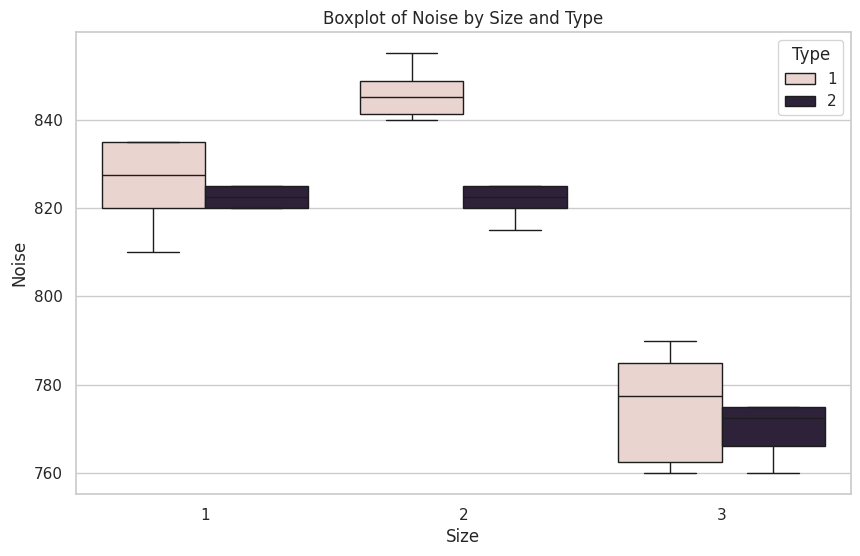

Normality test for group (1, 1) - W-statistic: 0.8179940910839023, p-value: 0.08478783979687668
Normality test for group (1, 2) - W-statistic: 0.6826765569390286, p-value: 0.004039328512451689
Normality test for group (2, 1) - W-statistic: 0.9075785338899112, p-value: 0.4206585292026257
Normality test for group (2, 2) - W-statistic: 0.8216155622835085, p-value: 0.09113502185141913
Normality test for group (3, 1) - W-statistic: 0.8482861927907107, p-value: 0.1524519406265245
Normality test for group (3, 2) - W-statistic: 0.8311415251720635, p-value: 0.10990751408393534
Assumption 5 - Normality for group (1, 1): Met (p-value: 0.08478783979687668)
Assumption 5 - Normality for group (1, 2): Not Met (p-value: 0.004039328512451689)
Assumption 5 - Normality for group (2, 1): Met (p-value: 0.4206585292026257)
Assumption 5 - Normality for group (2, 2): Met (p-value: 0.09113502185141913)
Assumption 5 - Normality for group (3, 1): Met (p-value: 0.1524519406265245)
Assumption 5 - Normality for gro

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Size', y='Noise', hue='Type')
plt.title('Boxplot of Noise by Size and Type')
plt.show()

normality_results = {}
for name, group in df.groupby(['Size', 'Type']):
    stat, p_value = stats.shapiro(group['Noise'])
    normality_results[name] = p_value
    print(f'Normality test for group {name} - W-statistic: {stat}, p-value: {p_value}')

for group, p in normality_results.items():
    if p < 0.05:
        print(f'Assumption 5 - Normality for group {group}: Not Met (p-value: {p})')
    else:
        print(f'Assumption 5 - Normality for group {group}: Met (p-value: {p})')

In [8]:
grouped_data = [group["Noise"].values for name, group in df.groupby(['Size', 'Type', 'Side'])]

stat, p_value = levene(*grouped_data)

print(f"Levene's Test Statistic: {stat}, p-value: {p_value}")


Levene's Test Statistic: 0.572192513368984, p-value: 0.8322190759825792


Levene's Test Statistic: 0.572192513368984

p-value: 0.8322190759825792


Assumption of homogeneity of variance holds (no significant difference in variance between groups).

Since the p-value (0.8322) is much greater than the common significance level (e.g., 0.05), this means we fail to reject the null hypothesis.